In [0]:
import os,random; from IPython.display import HTML
from mpl_toolkits.mplot3d import Axes3D; from matplotlib.lines import Line2D
import numpy,pylab,sympy; import matplotlib.colors

In [0]:
os.getcwd()

'/content'

In [0]:
X=[[[67/5,numpy.pi/2,0],[-14/5,11/7,-10],[2942/7,16/5,1],[43/5,39/10,2],[123/4,3/7,3],[10,3/5,4],
    [39/4,15/4,5],[44/7,49/12,6],[7/2,1,7],[29/7,8/7,8],[5/4,23/6,9]]+6*[[0,0,0]],
   [[-4019/4,numpy.pi/2,0],[-22/5,4/3,-8],[1841/6,19/7,1],[357/4,23/11,2],[106/3,4,3],[351/14,1/14,4],
    [127/8,22/7,5],[36/5,33/7,6],[91/18,22/9,7],[23/6,1/5,9],[17/6,9/2,10]]+6*[[0,0,0]],
   [[1198/3,numpy.pi/2,0],[-61/15,8/9,-8],[-51/5,4/3,-6],[1453/4,14/5,1],[614/7,13/6,2],[75/2,13/3,3],
    [122/5,1/16,4],[175/11,13/4,5],[19/4,9/5,7],[5,1/2,9],[13/7,4,10]]+6*[[0,0,0]],
   [[-13027/13,numpy.pi/2,0],[-14/3,2/5,-6],[-29/5,5/9,-5],[-37/4,1/3,-4],[3021/7,97/32,1],[179/9,34/11,2],
    [53/5,29/10,3],[1/2,18/5,7],[11/6,16/7,8],[11/5,7/3,9],[5/6,11/5,10]]+6*[[0,0,0]],
   [[785/2,numpy.pi/2,0],[-3/5,1/6,-10],[-23/7,2/7,-6],[-23/3,1/8,-5],[-10,1/5,-4],[2417/5,34/11,1],
    [89/4,16/5,2],[11/5,14/5,3],[31/16,17/6,7],[20/7,23/8,8],[17/7,11/4,9]]+6*[[0,0,0]],
   [[-1087/5,numpy.pi/2,0],[-2,4/3,-16],[-39/11,6/5,-14],[-21/4,14/9,-12],[-41/3,3/2,-6],
    [5028/5,23/12,1],[713/14,17/5,2],[103/3,7/3,3],[258/7,13/3,4],[142/13,1,5],[179/15,9/7,7],
    [17/3,13/3,8],[47/6,5/3,9],[90/13,22/5,10],[18/5,13/7,11],[18/5,7/5,13],[26/7,7/4,15]],
   [[-277/3,numpy.pi/2,0],[8875/6,28/9,1]]+15*[[0,0,0]],[[-467/5,numpy.pi/2,0],[4832/3,31/10,1]]+15*[[0,0,0]]]
Y=[[[-6393/7,numpy.pi/2,0],[-1/3,4/3,-10],[-21/22,3/5,-9],[-4,7/5,-5],[-21/4,1/4,-4],[4217/17,9/2,1],
    [74/3,15/7,2],[32/3,11/7,3],[7/4,16/5,6],[2,13/6,7],[4/5,2/3,8]]+6*[[0,0,0]],
   [[4843/9,numpy.pi/2,0],[-209/6,1/5,-4],[-249/8,6/5,-3],[577/2,40/9,1],[184/3,9/4,2],[83/7,2/3,5],
    [25/3,12/5,6],[5,17/6,7],[5/3,1/7,8],[23/6,1/4,9],[5/4,5/4,10]]+6*[[0,0,0]],
   [[5301/10,numpy.pi/2,0],[-131/4,4/5,-3],[1781/6,9/2,1],[422/7,9/4,2],[189/5,1/16,4],[79/6,8/5,5],
    [34/3,26/9,6],[22/5,23/7,7],[35/12,2/7,8],[11/4,5/7,9],[14/5,10/3,10]]+6*[[0,0,0]],
   [[2127/4,numpy.pi/2,0],[401,23/5,1],[118/3,7/5,2],[68/3,6/5,3],[133/8,6/5,4],[11/3,4/3,5],
    [24/7,57/14,6],[34/7,45/11,7],[25/7,37/9,8],[1/3,19/5,9],[9/5,3/5,10]]+6*[[0,0,0]],
   [[3688/7,numpy.pi/2,0],[13121/32,14/3,1],[44,10/7,2],[123/4,7/5,3],[15,4/3,4],[3/4,12/5,5],
    [27/5,13/3,6],[40/7,31/7,7],[13/6,13/3,8],[6/5,6/5,9],[58/19,1,10]]+6*[[0,0,0]],
   [[-9879/19,numpy.pi/2,0],[-19/7,8/7,-12],[-103/5,7/8,-5],[-80/9,11/7,-4],[3665/6,18/5,1],
    [803/6,13/5,2],[441/8,9/2,3],[17/2,4/5,6],[27/5,1/3,7],[17/3,2,8],[9/5,24/7,9],
    [15/4,26/7,10],[13/5,41/9,11],[16/17,1/5,13],[23/11,1/4,14],[7/4,25/12,15],[2/3,9/7,16]],
   [[1105/12,numpy.pi/2,0],[5913/4,14/3,1]]+15*[[0,0,0]],[[359/4,numpy.pi/2,0],[8012/5,14/3,1]]+15*[[0,0,0]]]

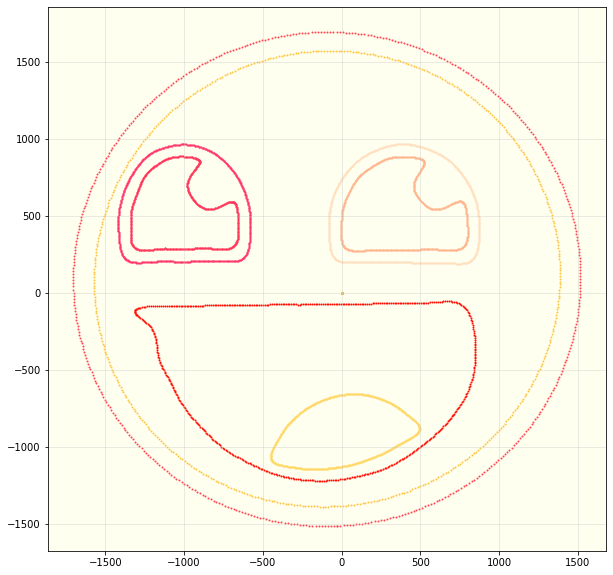

In [0]:
def unit_step(t):
  if t<0: return 0
  else: return 1
def bf(k,t): return k[0]*numpy.sin(k[1]+k[2]*t)
def us(j,t): return unit_step((31-4*j)*numpy.pi-t)*unit_step((-27+4*j)*numpy.pi+t)
def gus(t): return unit_step(numpy.sign(numpy.sin(t/2)))
def x(t):
  x=numpy.sum([numpy.sum([bf(X[j][i],t) for i in range(17)])*us(j,t)for j in range(8)])
  return x*gus(t)
def y(t):
  y=numpy.sum([numpy.sum([bf(Y[j][i],t) for i in range(17)])*us(j,t)for j in range(8)])
  return y*gus(t)
T=[numpy.linspace(.1**5,2*numpy.pi-.1**5,512)+2*numpy.pi*i for i in range(16)]
XT=[[x(T[i][j]) for j in range(512)] for i in range(16)]
YT=[[y(T[i][j]) for j in range(512)] for i in range(16)]
fig,ax=pylab.subplots(figsize=(10,10)); ax.set_facecolor('ivory')
col=[[numpy.append([1],numpy.random.random(2))] for i in range(16)]
[pylab.scatter(XT[i],YT[i],s=1,c=col[i]) for i in range(16)]
pylab.grid(c='silver',alpha=.4); pylab.show() 

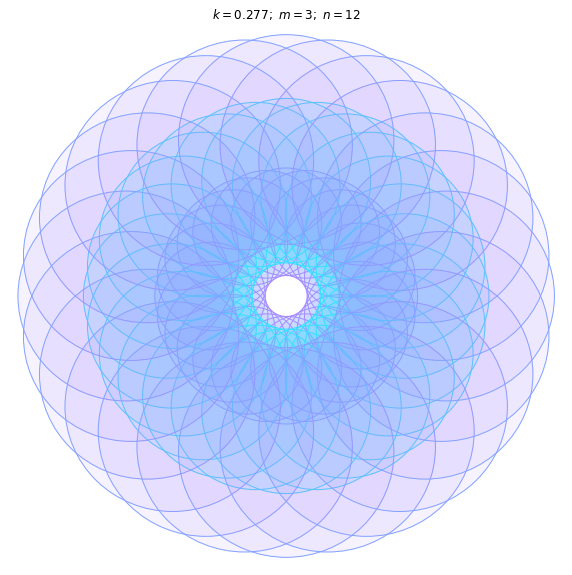

In [0]:
import pylab as pl; import matplotlib.patches as pt
import numpy as np; import random as rd
def rotate_xy(k,x,y):
    return np.array([[np.cos(i*np.pi/k)*x-np.sin(i*np.pi/k)*y,
                      np.sin(i*np.pi/k)*x+np.cos(i*np.pi/k)*y] for i in range(2*k)])
def circle_mandala(k,n,m):
    c=np.array([rotate_xy(n,.5+k*i,.5+k*i) for i in range(m)])
    r=[rd.randint(300,1800)/1000 for i in range(m)]
    l=.1+r[m-1]+c.max()
    col=[[rd.randint(100,900)/1000 for j in range(2)]+[1] for i in range(m)]
    fig,ax=pl.subplots(figsize=(10,10))
    for i in range(m):
        for j in range(2*n):
            ax.add_patch(pt.Circle(c[i][j],r[i],alpha=0.1,color=col[i]))
            ax.add_patch(pt.Circle(c[i][j],r[i],fill=False,edgecolor=col[m-i-1]))
    pl.title('$k=%.3f; \ m=%d; \ n=%d$'%(k,m,n))
    pl.axis('off'); pl.xlim(-l,l); pl.ylim(-l,l); pl.show()
k=rd.randint(100,900)/1000; n=rd.randint(5,15); m=rd.randint(3,9)
circle_mandala(k,n,m)

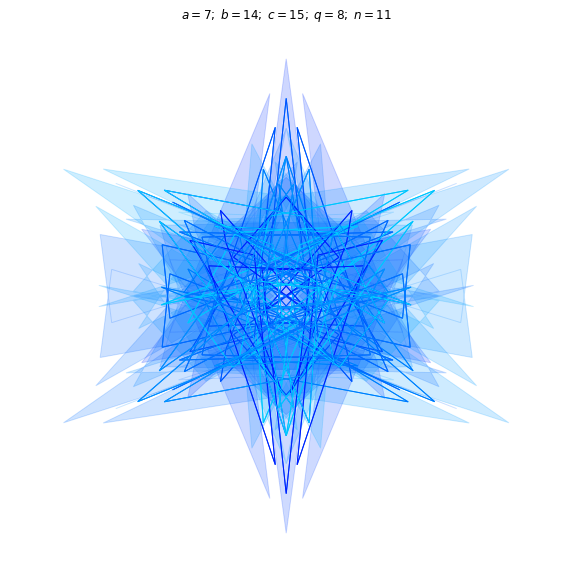

In [0]:
import pylab as pl; import matplotlib.patches as pt
import numpy as np; import random as rd
a,b,c,q=rd.randint(5,9),rd.randint(10,14),rd.randint(15,19),2*rd.randint(3,6) 
n=rd.randint(4,16); s1='$a=%d; \; b=%d; \; c=%d; \; q=%d; \; n=%d$'
def fy(t,k): return np.cos(np.pi*t/n+2*k*np.pi/q)+np.cos(a*np.pi*t/n+2*k*np.pi/q)+\
                    np.cos(b*np.pi*t/n+2*k*np.pi/q)+np.cos(c*np.pi*t/n+2*k*np.pi/q)
def fx(t,k): return np.sin(np.pi*t/n+2*k*np.pi/q)-np.sin(a*np.pi*t/n+2*k*np.pi/q)+\
                    np.sin(b*np.pi*t/n+2*k*np.pi/q)-np.sin(c*np.pi*t/n+2*k*np.pi/q)
L=np.array([[[fx(t,k),fy(t,k)] for t in range(2*n)] for k in range(2*q)])
LT=[[[1.5*fx(t,k),1.2*fy(t,k)] for t in range(2*n)] for k in range(2*q)]
pl.figure(figsize=(10,10)); ax=pl.gca(); ax.set_facecolor('lightgray')
def col(l): return np.array([l*rd.randint(100,900)/1000 for l in range(2)]+[1])
[ax.add_patch(pt.Polygon(LT[k],alpha=.1,color=col(1))) for k in range(2*q)]
[ax.add_patch(pt.Polygon(L[k],fill=False,color=col(.1))) for k in range(2*q)]
pl.title(s1%(a,b,c,q,n)); pl.axis('off'); 
pl.xlim(-5.5,5.5); pl.ylim(-5.5,5.5); pl.show()

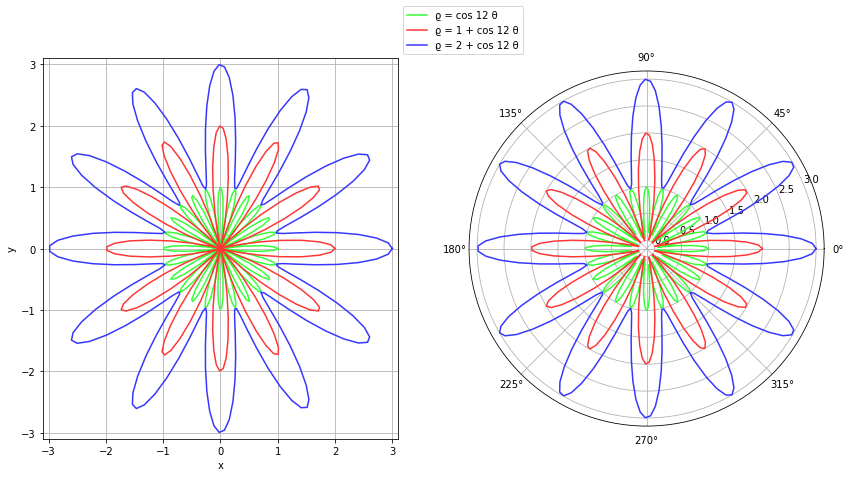

In [0]:
import numpy,pylab; T=numpy.linspace(start=0,stop=2*numpy.pi,num=200)
XY=numpy.array([[(numpy.cos(12*T)+r)*numpy.cos(T),
                 (numpy.cos(12*T)+r)*numpy.sin(T)] for r in range(3)])
XYP=numpy.array([[T,abs(r+numpy.cos(12*T))] for r in range(3)])
fig=pylab.figure(figsize=(14,7)) 
ax1=fig.add_subplot(121); ax2=fig.add_subplot(122,projection='polar')
colors=['#36ff36','#ff3636','#3636ff']
labels=[u'ϱ = cos 12 θ',u'ϱ = 1 + cos 12 θ',u'ϱ = 2 + cos 12 θ']
[ax1.plot(XY[i][0],XY[i][1],color=colors[i],label=labels[i]) for i in range(3)]
[ax2.plot(XYP[i][0],XYP[i][1],color=colors[i],label=labels[i]) for i in range(3)]
lines,labels=ax1.get_legend_handles_labels()
ax1.legend(lines,labels,bbox_to_anchor=(1,1.15),loc=2)
ax1.grid(); ax1.set_xlim(-3.1,3.1); ax1.set_ylim(-3.1,3.1) 
ax1.set_xlabel('x'); ax1.set_ylabel('y'); pylab.show()

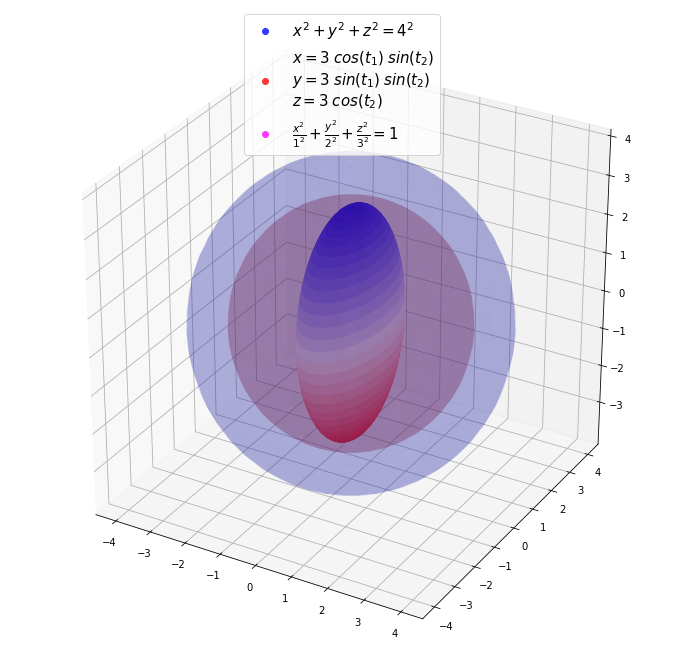

In [0]:
import numpy,pylab; from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
angle=numpy.linspace(0,2*numpy.pi,64); T1,T2=numpy.meshgrid(angle,angle)
X=numpy.cos(T1)*numpy.sin(T2); Y=numpy.sin(T1)*numpy.sin(T2); Z=numpy.cos(T2)
labels=['$x^2+y^2+z^2=4^2$',
        '$x=3\;cos(t_1)\;sin(t_2)$\n$y=3\;sin(t_1)\;sin(t_2)$\n$z=3\;cos(t_2)$',
        '$\\frac{x^2}{1^2}+\\frac{y^2}{2^2}+\\frac{z^2}{3^2}=1$']
colors=['#3636ff','#ff3636','#ff36ff']
fig=pylab.figure(figsize=(12,12)); ax=fig.add_subplot(111,projection='3d')
ax.plot_surface(4*X,4*Y,4*Z,color=colors[0],alpha=0.1)
ax.plot_surface(3*X,3*Y,3*Z,color=colors[1],alpha=0.1)
ax.plot_surface(1*X,2*Y,3*Z,cmap=pylab.cm.bwr_r,linewidth=1,
                antialiased=True,rstride=1,cstride=1)
fake2Dlines=[Line2D([0],[0],linestyle="none",c=c,marker='o') for c in colors]
ax.legend(fake2Dlines,labels,loc=9,fontsize=15); pylab.show()

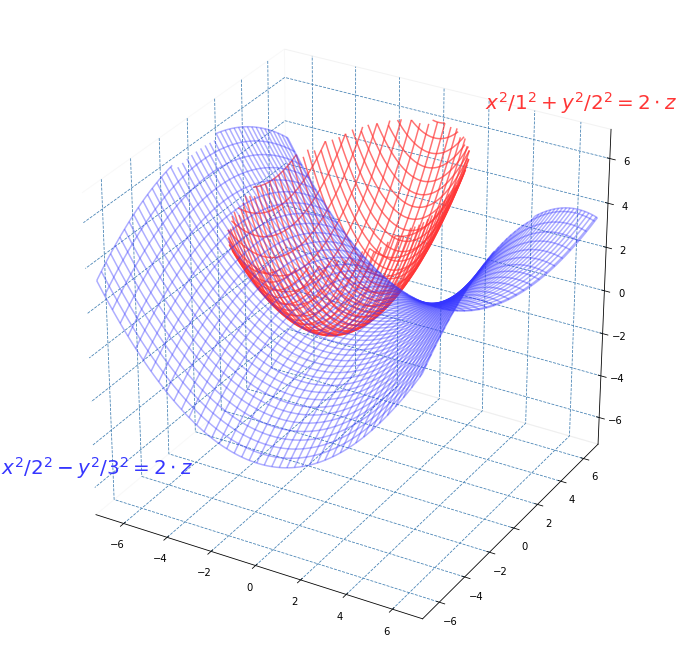

In [0]:
from mpl_toolkits.mplot3d import Axes3D; import numpy,pylab
pylab.rcParams['grid.color']='steelblue'; pylab.rcParams['grid.linestyle']='--'
X=numpy.linspace(-7,7,128); X,Y=numpy.meshgrid(X,X)
Z1=1/2*X**2+1/8*Y**2; Z1[Z1>6]=numpy.nan;
Z2=1/8*X**2-1/18*Y**2; Z2[Z2<-6]=numpy.nan; Z2[Z2>6]=numpy.nan;
f=pylab.figure(figsize=(12,12)); ax=f.add_subplot(111,projection='3d')
ax.plot_wireframe(X,Y,Z1,alpha=0.7,colors='#ff3636')
ax.plot_wireframe(X,Y,Z2,alpha=0.4,colors='#3636ff')
ax.text(2,7,7,'$x^2/1^2+y^2/2^2=2 \cdot z$',color='#ff3636',fontsize=20)
ax.text(-12,-7,-7,'$x^2/2^2-y^2/3^2=2 \cdot z$',color='#3636ff',fontsize=20)
ax.xaxis.pane.fill,ax.yaxis.pane.fill,ax.zaxis.pane.fill=False,False,False
ax.set_xlim(-7,7); ax.set_ylim(-7,7); ax.set_zlim(-7,7); pylab.show()

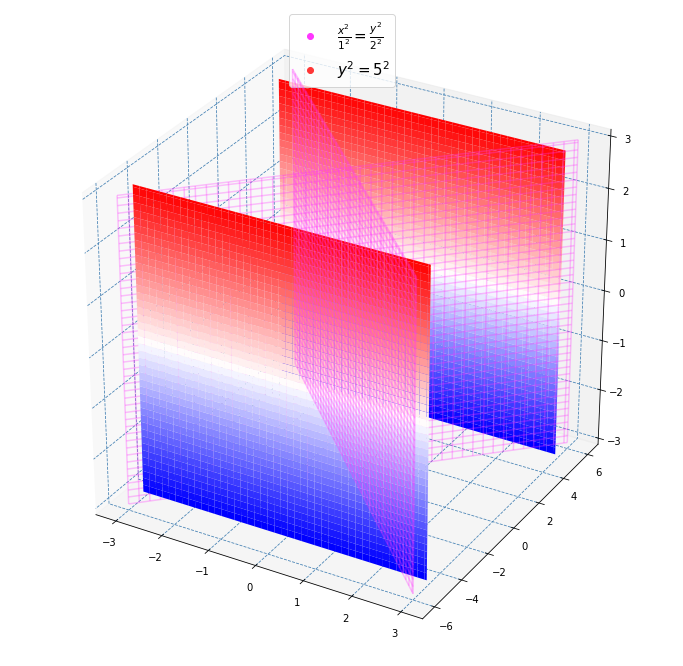

In [0]:
from mpl_toolkits.mplot3d import Axes3D; from matplotlib.lines import Line2D
import numpy,pylab; X=numpy.linspace(-3,3,128); X,Z=numpy.meshgrid(X,X) 
def f1(x,z): return 2*x
def f2(x,z): return 5
Y=[f1(X,Z),-f1(X,Z),f2(X,Z),-f2(X,Z)] 
colors=['#ff36ff','#ff3636']
labels=['$\\frac{x^2}{1^2}=\\frac{y^2}{2^2}$','$y^2=5^2$']
fig=pylab.figure(figsize=(12,12)); ax=fig.add_subplot(111,projection='3d')
[ax.plot_wireframe(X,y,Z,color=colors[0],alpha=0.3) for y in Y[:2]]
[ax.plot_surface(X,y,Z,cmap=pylab.cm.bwr,linewidth=1,
                 antialiased=True,rstride=3,cstride=3) for y in Y[2:]]
fake2Dlines=[Line2D([0],[0],linestyle="none",c=c,marker='o') for c in colors]
ax.legend(fake2Dlines,labels,loc=9,fontsize=15); pylab.show()

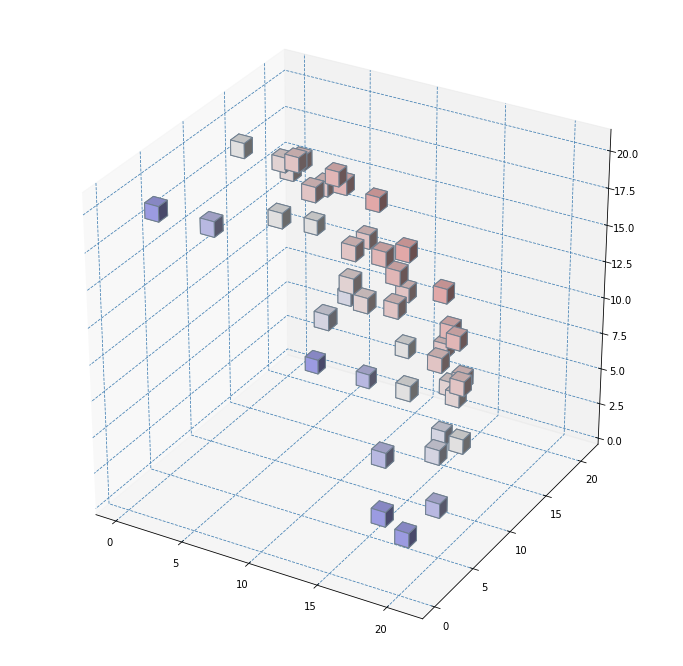

In [0]:
from mpl_toolkits.mplot3d import Axes3D; import numpy,pylab
k=21; x,y,z=numpy.indices((k,k,k)); eq=(x-4)**2+(y-5)**2+(z-6)**2==225
f=pylab.figure(figsize=(12,12)); ax=f.gca(projection='3d')
ax.voxels(eq,facecolors=pylab.cm.bwr((x+y+z)*4),edgecolor='slategray')
pylab.show()

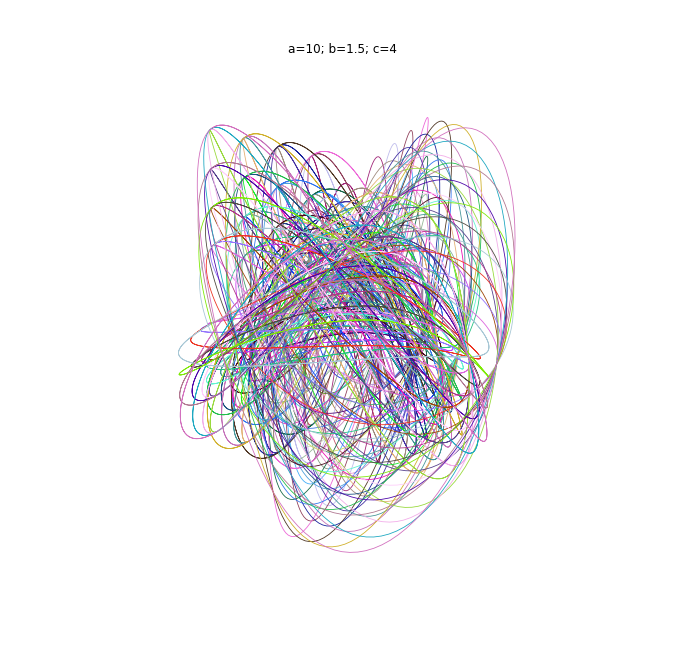

In [0]:
import numpy,pylab,random; a,b,c=random.randrange(2,12),1.5,random.randrange(1,5) 
r=numpy.arange(1,c+1); th=.1+random.random() 
t=numpy.arange(-2*b*numpy.pi,2*b*numpy.pi,5/10**random.randrange(1,3)) 
fx=(a+numpy.cos(b*t))*numpy.cos(t); fy=(a+numpy.cos(b*t))*numpy.sin(t); fz=numpy.sin(b*t)
fig=pylab.figure(figsize=(12,12)); ax=fig.gca(projection='3d')
for i in r:
    for j in r:
        for k in r:
            col=[random.random() for l in range(3)]
            ax.plot(i*fx,j*fy,k*fz,c=col,linewidth=th)
pylab.axis('off'); pylab.title('a=%d; b=%.1f; c=%d'%(a,b,c)); pylab.show()

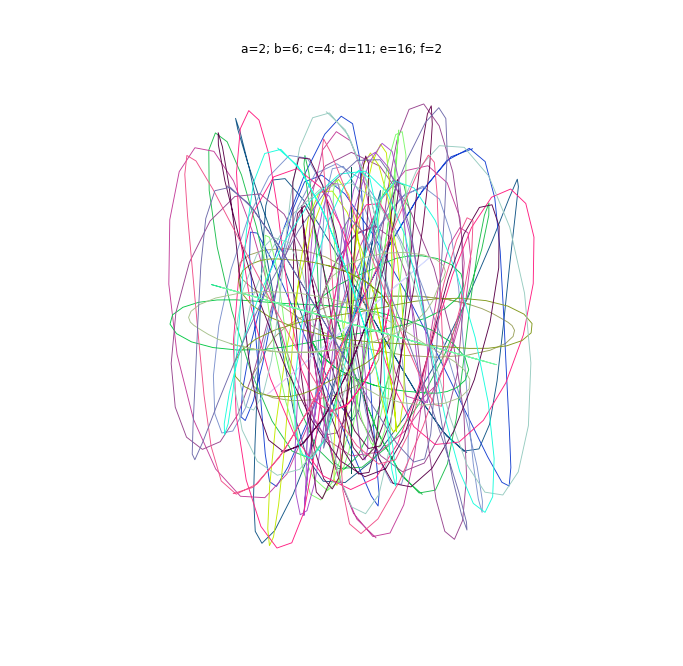

In [0]:
import numpy,pylab,random; r=[-1,0,1]; th=.1+random.random()
a,b,c=random.randint(1,3),random.randint(4,6),random.randint(2,4)
d,e,f=random.randint(9,11),random.randint(14,16),random.randint(1,3)
t=numpy.arange(0,2*numpy.pi+.5,1/10**random.randint(1,3)) 
fx=-d*numpy.cos(t)-f*numpy.cos(b*t)+e*numpy.sin(a*t)
fy=-e*numpy.cos(a*t)+d*numpy.sin(t)-f*numpy.sin(b*t) 
fz=d*numpy.cos(c*t)
fig=pylab.figure(figsize=(12,12)); ax=fig.gca(projection='3d')
for i in r:
    for j in r:
        for k in r:
            col=[random.random() for l in range(3)]
            ax.plot(i*fx,j*fy,k*fz,c=col,linewidth=th)
pylab.title('a=%d; b=%d; c=%d; d=%d; e=%d; f=%d'%(a,b,c,d,e,f))
pylab.axis('off'); pylab.show()

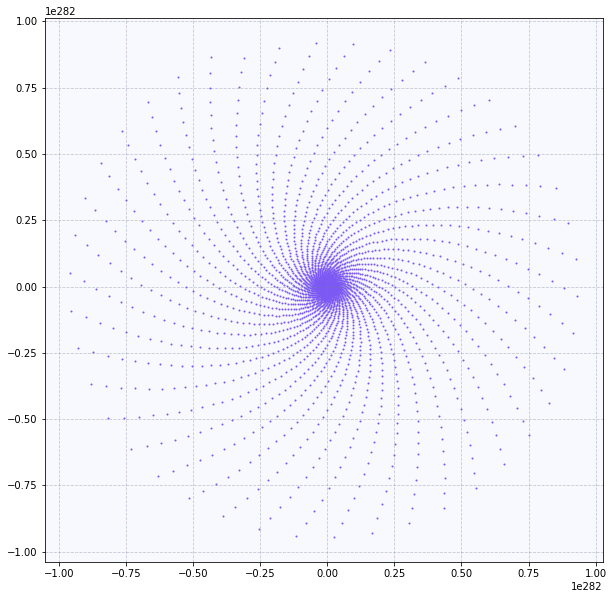

In [0]:
import numpy,pylab
def gen(a,n):
    i=1; z0=numpy.array([1+1j])[0]; xyi=[(a*z0).real,(a*z0).imag]
    while i<=n:
        yield xyi; i+=1; xi,yi=xyi[0],xyi[1]; zi=numpy.array([xi+yi*1j])[0]
        zi=a+(1-a)*zi; xyi=[zi.real,zi.imag]
n=500000; a=.01+.15*1j; xy=gen(a,n); xyn=numpy.array([el for el in xy])      
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('ghostwhite')
pylab.scatter(xyn[:,0],xyn[:,1],s=1,c=[numpy.random.random(3)])
pylab.grid(c='slategray',alpha=.4); pylab.show()

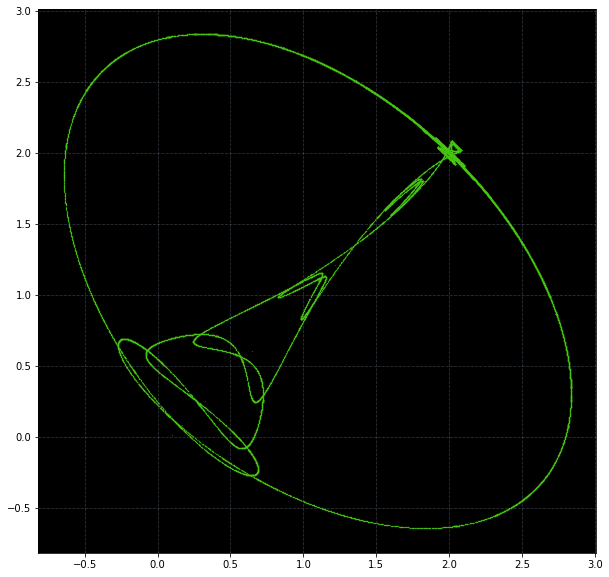

In [0]:
import numpy,pylab
def gen(n):
    i=1; xyi=[.1,.01]
    while i<=n:
        yield xyi; i+=1; xi,yi=xyi[0],xyi[1]
        xyi=[xi+.684*(xi-xi**2+yi),yi+.684*(yi-yi**2+xi)]
n=50000; xy=gen(n); xyn=numpy.array([el for el in xy])      
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('black')
pylab.scatter(xyn[:,0],xyn[:,1],s=.03,c=[numpy.random.random(3)])
pylab.grid(c='slategray',alpha=.4); pylab.show()

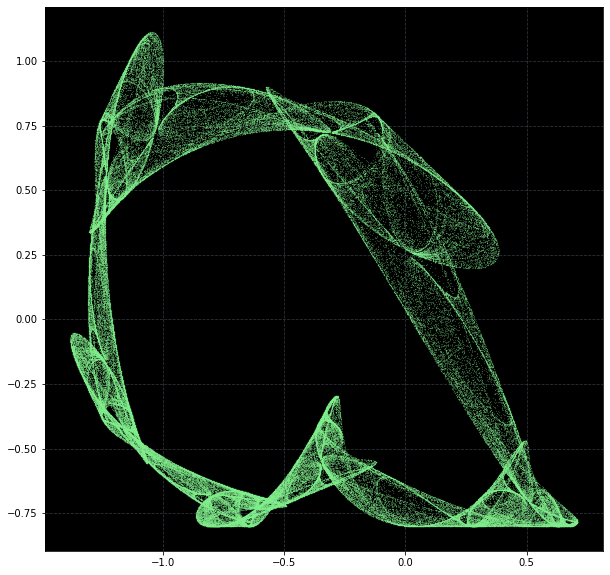

In [0]:
import numpy,pylab
def gen(n):
    i=1; xyi=[.1,.1]
    while i<=n:
        yield xyi; i+=1; xi,yi=xyi[0],xyi[1]
        xyi=[.7*xi+yi,-.8+xi**2]
n=200000; xy=gen(n); xyn=numpy.array([el for el in xy])      
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('black')
pylab.scatter(xyn[:,0],xyn[:,1],s=.01,c=[numpy.random.random(3)])
pylab.grid(c='slategray',alpha=.4); pylab.show()

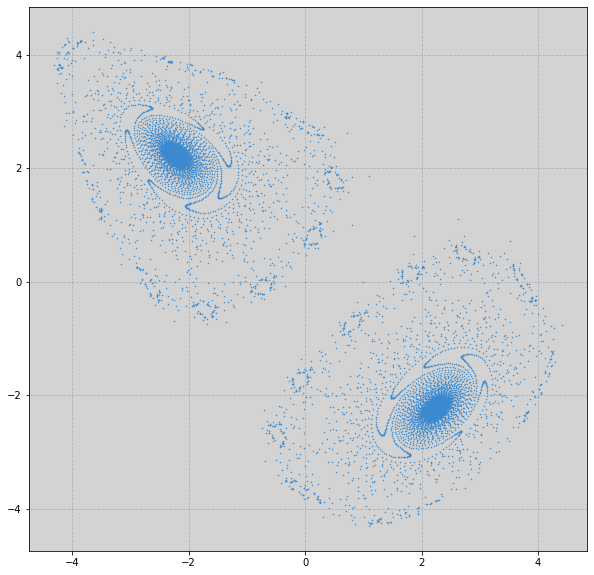

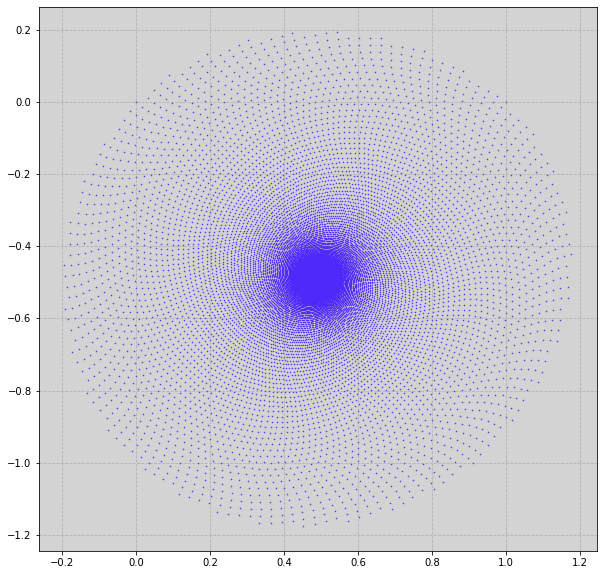

In [0]:
def gen(a,b,n):
    i=1; xyi=[0.,0.]
    while i<=n:
        yield xyi; i+=1; xi,yi=xyi[0],xyi[1]
        xyi=[1-(.2+.01*a)*xi**2+yi,(0.9991+.0001*b)*xi]
for [a,b] in [[0,0],[-11,-19987]]:
    n=300000; xy=gen(a,b,n); xyn=numpy.array([el for el in xy])      
    pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('lightgray')
    pylab.scatter(xyn[:,0],xyn[:,1],s=.3,c=[numpy.random.random(3)])
    pylab.grid(c='slategray',alpha=.4); pylab.show()

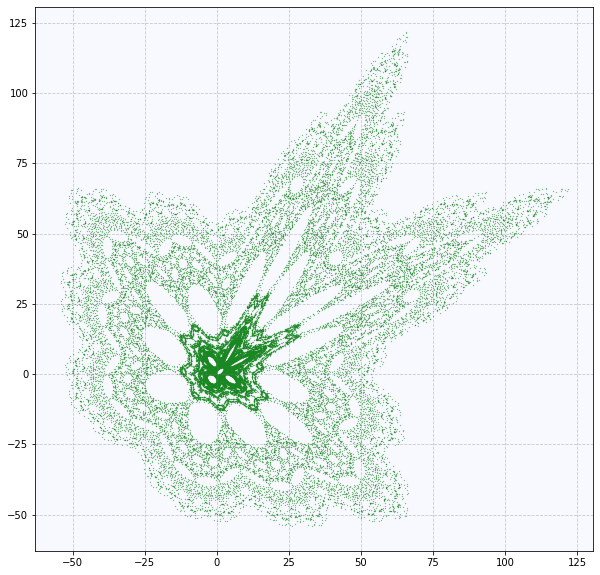

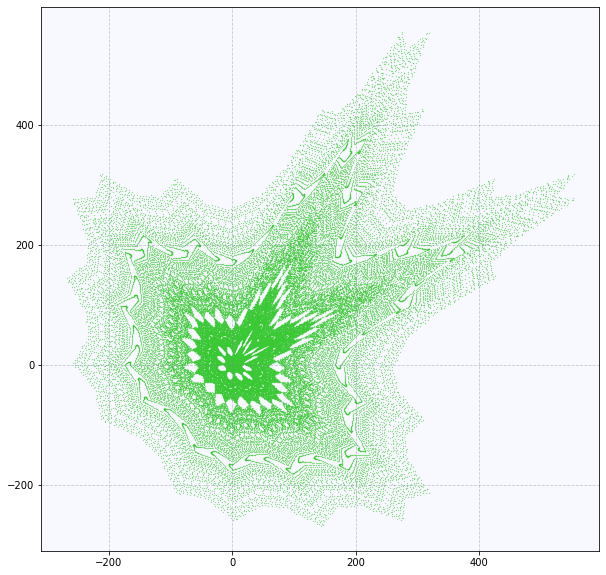

In [0]:
import numpy,pylab
def gen(a,b,n):
    i=1; xyi=[0.,0.]
    while i<=n:
        yield xyi; i+=1; xi,yi=xyi[0],xyi[1]
        xyi=[(1+.01*a)*abs(xi)-(1+.00001*b)*yi+1,xi]
for n in [50000,100000]: 
    a,b=7,5; xy=gen(a,b,n); xyn=numpy.array([el for el in xy])      
    pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('ghostwhite')
    pylab.scatter(xyn[:,0],xyn[:,1],s=.05,c=[numpy.random.random(3)])
    pylab.grid(c='slategray',alpha=.4); pylab.show()

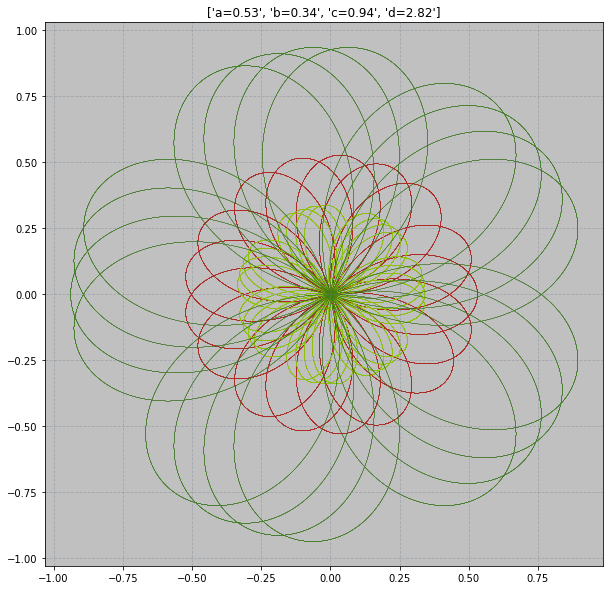

In [0]:
import numpy,pylab; [a,b,c]=[.01*numpy.random.randint(30,99) for i in range(3)]
d=numpy.max([a,2.*b,3.*c]); n=numpy.random.randint(5,11)
def coord(m,k,p,n):
    t=numpy.arange(0,k*numpy.pi,k*numpy.pi/(72000.*n))
    x=m*numpy.sin(p*t)*numpy.cos(t); y=m*numpy.sin(p*t)*numpy.sin(t)
    return [x,y]
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('silver')
for [x,y] in [coord(a,8.95,1.9,n),coord(b,12.18,2.3,n),coord(c,11.77,1.7,n)]:
    pylab.scatter(x,y,s=.0001,c=[numpy.random.random(3)])
pylab.title(['a=%.2f'%a,'b=%.2f'%b,'c=%.2f'%c,'d=%.2f'%d]) 
pylab.grid(c='slategray',alpha=.4); pylab.show()

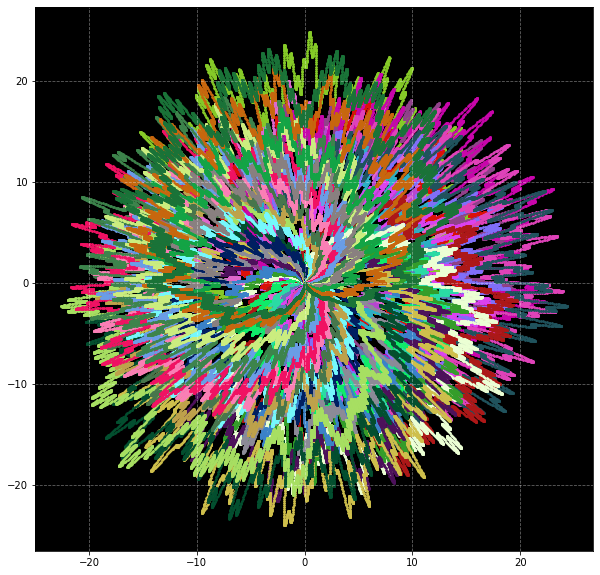

In [38]:
import numpy,pylab; pi=numpy.pi; n=36; t=numpy.arange(0,2*pi,2*pi/(360.*n))
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('black')
def randi(nmin,nmax): return numpy.random.randint(nmin,nmax)
for i in range(n):
    a,b,c,d=randi(5,11),randi(12,24),randi(25,81),randi(216,256)
    f1=(a+.9*numpy.cos(b*t+2*pi*i/n))*(1+.1*numpy.cos(c*t+2*pi*i/n))
    f2=(1+.05*numpy.cos(d*t+2*pi*i/n))*(1+numpy.sin(t+2*pi*i/n))
    x=f1*f2*numpy.cos(t); y=f1*f2*numpy.sin(t)
    pylab.scatter(x,y,s=3,c=[numpy.random.random(3)])
pylab.grid(c='white',alpha=.4); pylab.show()

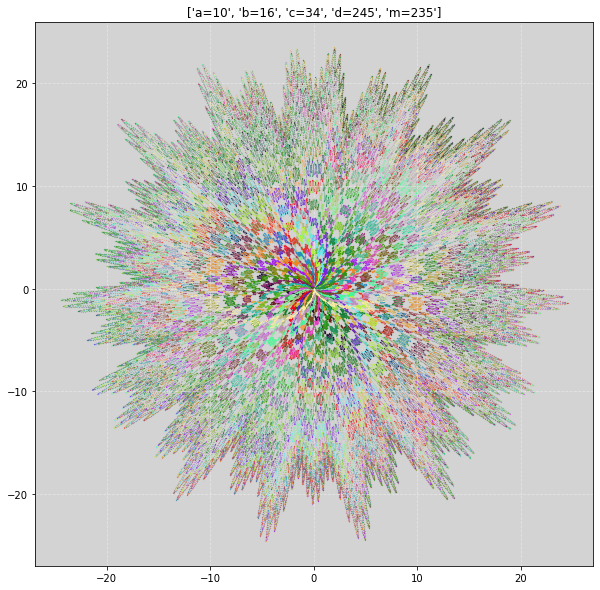

In [40]:
import numpy,pylab; pi=numpy.pi 
def randi(nmin,nmax): return numpy.random.randint(nmin,nmax)
n=36; m=randi(100,400); t=numpy.arange(0,2*pi,2*pi/(m*n))
a,b,c,d=randi(5,11),randi(12,24),randi(25,81),randi(216,256)
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('lightgray')
for i in range(n):
    f1=(a+.9*numpy.cos(b*t+2*pi*i/n))*(1+.1*numpy.cos(c*t+2*pi*i/n))
    f2=(1+.05*numpy.cos(d*t+2*pi*i/n))*(1+numpy.sin(t+2*pi*i/n))
    x=f1*f2*numpy.cos(t); y=f1*f2*numpy.sin(t)
    pylab.scatter(x,y,s=.01,c=[numpy.random.random(3)])
pylab.title(['a=%d'%a,'b=%d'%b,'c=%d'%c,'d=%d'%d,'m=%d'%m])
pylab.grid(c='white',alpha=.4); pylab.show()

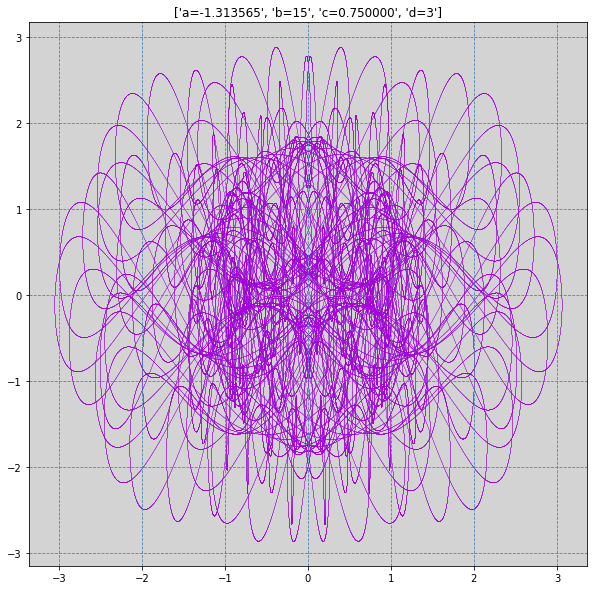

In [44]:
import numpy,pylab; pi=numpy.pi 
def randi(nmin,nmax): return numpy.random.randint(nmin,nmax)
def randc(a): return numpy.random.choice(a,1)[0]
a,c=(.5+numpy.random.random())*randc([-1,1]),.01*randi(1,99)**randc([-1,1])
b,d=randi(6,18),randi(3,6); t=numpy.arange(0,8*b*pi,1/(720.*b))
fx=numpy.sin(t/6)+a*numpy.sin(b*t)*numpy.cos(t)+c*numpy.sin(b*t)
fy=numpy.cos(t/6)+a*numpy.sin(b*t)*numpy.sin(t)+c*numpy.cos(d*b*t)
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('lightgray')
pylab.scatter(fx,fy,s=.1**4,c=[numpy.random.random(3)])
pylab.title(['a=%f'%a,'b=%d'%b,'c=%f'%c,'d=%d'%d]); pylab.grid(); pylab.show()

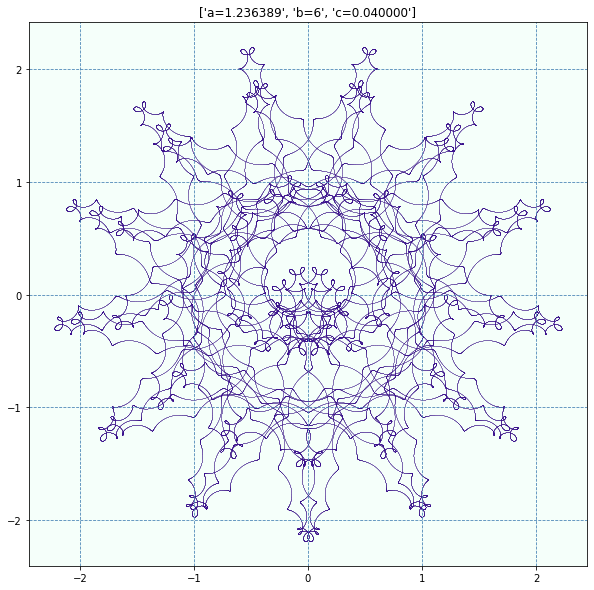

In [47]:
import numpy,pylab; pi=numpy.pi 
def randi(nmin,nmax): return numpy.random.randint(nmin,nmax)
def randc(a): return numpy.random.choice(a,1)[0]
a,c=(.5+numpy.random.random())*randc([-1,1]),.001*randi(1,99)*randc([-1,1])
b=randi(3,12); t=numpy.arange(0,16*b*pi,1/(720*b))
fx=numpy.sin(t/6)+a*numpy.sin(b*t)*numpy.cos(t)-c*numpy.sin(16*b*t)
fy=numpy.cos(t/6)+a*numpy.sin(b*t)*numpy.sin(t)-c*numpy.cos(16*b*t)
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('mintcream')
pylab.scatter(fx,fy,s=.1**4,c=[numpy.random.random(3)])
pylab.title(['a=%f'%a,'b=%d'%b,'c=%f'%c]); pylab.grid(); pylab.show()

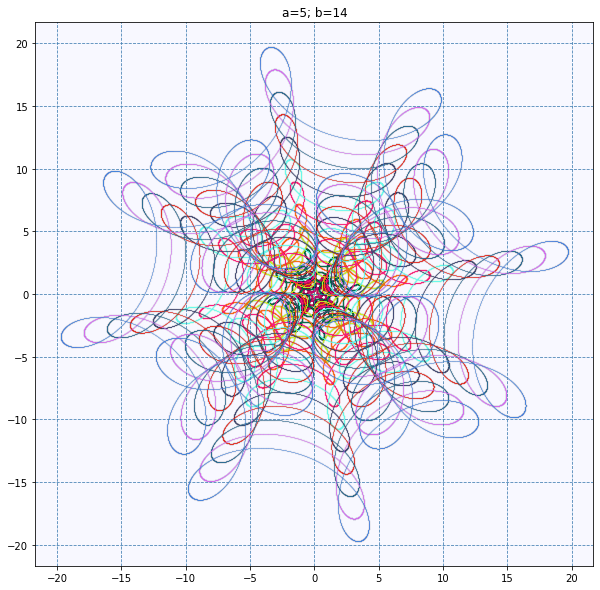

In [60]:
import numpy,pylab; pi=numpy.pi 
def randi(nmin,nmax): return numpy.random.randint(nmin,nmax)
def x(a,b,t,k): return k*(numpy.cos(t)+numpy.cos(a*t)/2+numpy.sin((a+b)*t)/3)
def y(a,b,t,k): return k*(numpy.sin(t)+numpy.sin(a*t)/2+numpy.cos((a+b)*t)/3)
A,B=randi(5,11),randi(12,36); T=numpy.arange(0,2*pi,1/10**4)
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('ghostwhite')
for k in range(12):
    pylab.scatter(x(A,B,T,k),y(A,B,T,k),s=.1**3,c=[numpy.random.random(3)])
pylab.title('a=%d; b=%d'%(A,B)); pylab.grid(); pylab.show()

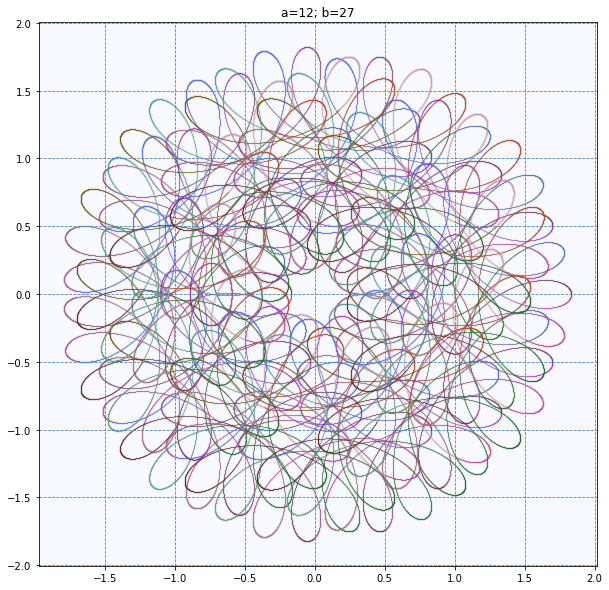

In [71]:
import numpy,pylab; pi=numpy.pi 
def randi(nmin,nmax): return numpy.random.randint(nmin,nmax)
def t(i): return numpy.arange((i-1)*pi/24,i*pi/24,1/10**4)
def x(a,b,i,k): return numpy.cos(t(i)+k*pi/6)+numpy.cos(a*t(i))/2+numpy.sin((a+b)*t(i))/3
def y(a,b,i,k): return numpy.sin(t(i)+k*pi/6)+numpy.sin(a*t(i))/2+numpy.cos((a+b)*t(i))/3
A,B=randi(5,15),randi(10,36) 
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('ghostwhite')
for i in range(48):
  col=[numpy.random.random(3)]
  for k in range(12): pylab.scatter(x(A,B,i,k),y(A,B,i,k),s=.1**3,c=col)
pylab.title('a=%d; b=%d'%(A,B)); pylab.grid(); pylab.show()

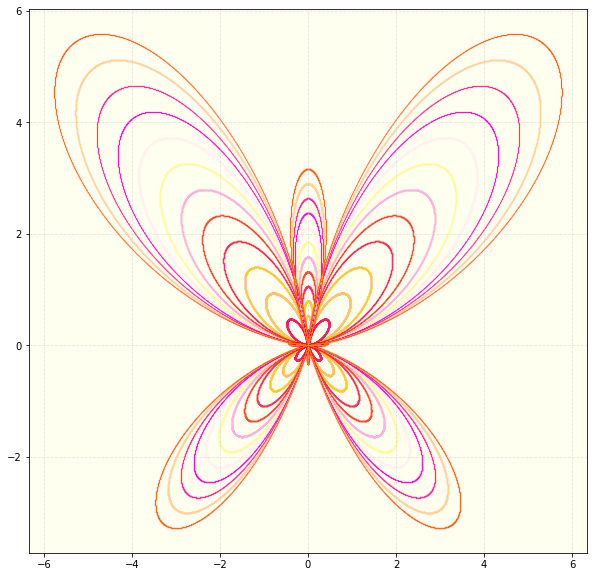

In [110]:
import numpy,pylab; pi=numpy.pi; t=numpy.arange(0,2*pi,.1**4)
def col(): return [numpy.append([1],numpy.random.random(2))]
def f(t): return numpy.exp(numpy.cos(t)**2+numpy.sin(t))-3*numpy.cos(4*t)
def fx(k,t): return .1*(k+1)*f(t)*numpy.cos(t)
def fy(k,t): return .1*(k+1)*f(t)*numpy.sin(t)
pylab.figure(figsize=(10,10)); ax=pylab.gca(); ax.set_facecolor('ivory')
[pylab.scatter(fx(i,t),fy(i,t),s=.1**3,c=col()) for i in range(12)]
pylab.grid(c='silver',alpha=.4); pylab.show()